<a href="https://colab.research.google.com/github/Timure228/Hands-on-ML/blob/main/chapter_17_Autoencoders_GAN_DIFF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Simple linear autoencoder to perform PCA, to project 3D to 2D
import tensorflow as tf

encoder = tf.keras.Sequential([tf.keras.layers.Dense(2)])
decoder = tf.keras.Sequential([tf.keras.layers.Dense(3)])
autoencoder = tf.keras.Sequential([encoder, decoder])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)
autoencoder.compile(loss="mse", optimizer=optimizer)

In [ ]:
import numpy as np

# Generate 3D dataset to train the PCA autoencoder
X_train = np.random.randint(140, size=(500, 4, 1))
history = autoencoder.fit(X_train, X_train, epochs=400, verbose=False)
codings = encoder.predict(X_train)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
X_valid = X_train[50_000:]
X_train = X_train[:50_000]

In [ ]:
len(X_train)

50000

In [ ]:
X_valid = X_train[50_000:]
X_train = X_train[:50_000]

# Implementing a stacked autoencoder
stacked_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu")
])

stacked_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])

stacked_autoencoder = tf.keras.Sequential([stacked_encoder, stacked_decoder])

stacked_autoencoder.compile(loss="mse", optimizer="nadam")
history = stacked_autoencoder.fit(X_train, X_train, epochs=20,
                                  validation_data=(X_valid, X_valid))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 2274.7339 - val_loss: 1120.6230
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1080.6715 - val_loss: 1023.2295
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 1000.8369 - val_loss: 978.0010
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 963.2407 - val_loss: 951.1752
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - loss: 941.1697 - val_loss: 946.6632
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - loss: 924.2103 - val_loss: 930.1062
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 913.0522 - val_loss: 910.5096
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 898.5446 - val_loss: 911.3348
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 892.9258 - val_loss: 898.4197
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 881.9981 - val_loss: 892.8920
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


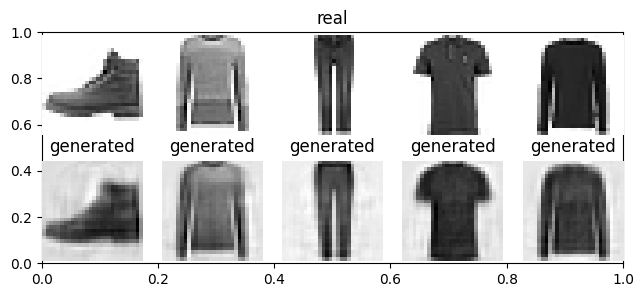

In [ ]:
import matplotlib.pyplot as plt

def plot_reconstructions(model, images=X_valid, n_images=5):
  reconstructions = model.predict(images[:n_images])
  fig = plt.figure(figsize=(n_images * 1.5, 3))
  plt.title("real")
  for image_index in range(n_images):
    plt.subplot(2, n_images, 1 + image_index)
    plt.imshow(images[image_index], cmap="binary")
    plt.axis("off")
    plt.subplot(2, n_images, 1 + n_images + image_index)
    plt.imshow(reconstructions[image_index], cmap="binary")
    plt.axis("off")
    plt.title("generated")
  plt.show()

plot_reconstructions(stacked_autoencoder)

In [ ]:
# Reduce dataset dimensionality first with stacked_encoder and then with TSNE down to 2
from sklearn.manifold import TSNE

X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE(init="pca", learning_rate="auto", random_state=42)
X_valid_2D = tsne.fit_transform(X_valid_compressed)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_valid = y_train[50_000:]
y_train = y_train[:50_000]

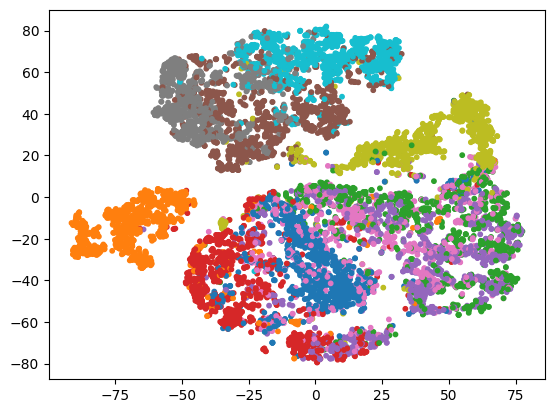

In [ ]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")
plt.show()

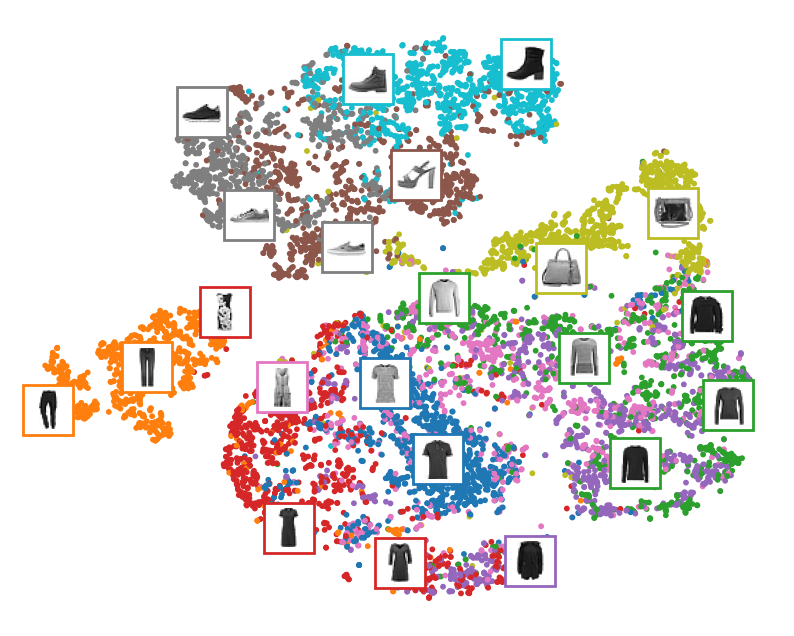

In [ ]:
import matplotlib as mpl

plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
Z = X_valid_2D
Z = (Z - Z.min()) / (Z.max() - Z.min())  # normalize to the 0-1 range
plt.scatter(Z[:, 0], Z[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(Z):
    dist = ((position - image_positions) ** 2).sum(axis=1)
    if dist.min() > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)

plt.axis("off")
plt.show()

# Tying Weights

In [ ]:
class DenseTranspose(tf.keras.layers.Layer):
  def __init__(self, dense, activation=None, **kwargs):
    super().__init__(**kwargs)
    self.dense = dense
    self.activation = tf.keras.activations.get(activation)

  def build(self, batch_input_shape):
    self.biases = self.add_weight(name="bias",
                                  shape=self.dense.input_shape[-1],
                                  initializer="zeros")
    super().build(batch_input_shape)

  def call(self, inputs):
    Z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
    return self.activation(Z + self.biases)

In [ ]:
dense_1 = tf.keras.layers.Dense(100, activation="relu")
dense_2 = tf.keras.layers.Dense(30, activation="relu")

tied_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    dense_1,
    dense_2
])

tied_decoder = tf.keras.Sequential([
    DenseTranspose(dense_2, activation="relu"),
    DenseTranspose(dense_1),
    tf.keras.layers.Reshape([28, 28])
])

tied_autoencoder = tf.keras.Sequential([tied_encoder, tied_decoder])

In [ ]:
tied_autoencoder.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_7 (Sequential)       │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# CNN Autoencoder for Fashion MNIST
conv_encoder = tf.keras.Sequential([
    tf.keras.layers.Reshape([28, 28, 1]),
    tf.keras.layers.Conv2D(16, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2), # output: 14 x 14 x 16
    tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2), # output: 7 x 7 x 132
    tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2), # output: 3 x 3 x 64
    tf.keras.layers.Conv2D(30, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D() # output: 30
])

conv_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(3 * 3 * 16),
    tf.keras.layers.Reshape((3, 3, 16)),
    tf.keras.layers.Conv2DTranspose(32, 3, strides=2, activation="relu"),
    tf.keras.layers.Conv2DTranspose(16, 3, strides=2, padding="same",
                                    activation="relu"),
    tf.keras.layers.Conv2DTranspose(1, 3, strides=2, padding="same"),
    tf.keras.layers.Reshape([28, 28])
])

conv_autoencoder = tf.keras.Sequential([conv_encoder, conv_decoder])

In [ ]:
# Denoising stacked autoencoder using Gaussian noise
encoder_input = tf.keras.layers.Input([28, 28, 1])
encoder_flatten = tf.keras.layers.Flatten()(encoder_input)
gauss = tf.keras.layers.GaussianNoise(0.5)(encoder_flatten)
concat = tf.keras.layers.concatenate([encoder_flatten, gauss])
hidden1 = tf.keras.layers.Dense(100, activation="relu")(concat)
encoder_output = tf.keras.layers.Dense(30, activation="relu")(hidden1)

encoder = tf.keras.models.Model(encoder_input, encoder_output)

decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])

gaussian_autoencoder = tf.keras.Sequential([encoder, decoder])

In [ ]:
gaussian_autoencoder.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_9 (Functional)       │ (None, 30)             │       159,930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_16 (Sequential)      │ (None, 28, 28)         │        92,384 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,314 (985.60 KB)

 Trainable params: 252,314 (985.60 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Sparse Autoencoder
sparse_l1_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(300, activation="sigmoid"),
    tf.keras.layers.ActivityRegularization(l1=1e-4)
])
sparse_l1_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])
sparse_l1_autoencoder = tf.keras.Sequential([sparse_l1_encoder, sparse_l1_decoder])

In [ ]:
# Create regularizer for KL divergence
kl_divergence = tf.keras.losses.kullback_leibler_divergence

class KLDivergenceRegularizer(tf.keras.regularizers.Regularizer):
  def __init__(self, weight, target):
    self.weight = weight
    self.target = target

  def __call__(self, inputs):
    mean_activities = tf.reduce_mean(inputs, axis=0)
    return self.weight * (
        kl_divergence(self.target, mean_activities) +
        kl_divergence(1. - self.target, 1. - mean_activities))

In [ ]:
# Build Sparse Autoencoder using KLDivergenceRegularizer() for coding layer's activations
kld_reg = KLDivergenceRegularizer(weight=5e-3, target=0.1)
sparse_kl_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(300, activation="sigmoid",
                          activity_regularizer=kld_reg)
])
sparse_kl_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])
sparse_kl_autoencoder = tf.keras.Sequential([sparse_kl_encoder, sparse_kl_decoder])

### Variational Autoencoder

In [38]:
# Custom layer to sample the codings
class Sampling(tf.keras.layers.Layer):
  def call(self, inputs):
    mean, log_var = inputs
    return tf.random.normal(tf.shape(log_var)) * tf.exp(log_var / 2) + mean

In [ ]:
# Create the encoder
codings_size = 10

inputs = tf.keras.layers.Input([28, 28])
Z = tf.keras.layers.Flatten()(inputs)
Z = tf.keras.layers.Dense(150, activation="relu")(Z)
Z = tf.keras.layers.Dense(100, activation="relu")(Z)
codings_mean = tf.keras.layers.Dense(codings_size)(Z) # u
codings_log_var = tf.keras.layers.Dense(codings_size)(Z) # y
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = tf.keras.Model(inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

In [ ]:
# Create the decoder
decoder_inputs = tf.keras.layers.Input(shape=[codings_size])
x = tf.keras.layers.Dense(100, activation="relu")(decoder_inputs)
x = tf.keras.layers.Dense(150, activation="relu")(x)
x = tf.keras.layers.Dense(28 * 28)(x)
outputs = tf.keras.layers.Reshape([28, 28])(x)
variational_decoder = tf.keras.Model(inputs=[decoder_inputs], outputs=[outputs])

In [ ]:
# Create the variational autoencoder
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_autoencoder = tf.keras.Model(inputs=[inputs], outputs=[reconstructions])

In [ ]:
import numpy as np
# Add the cost functions
latent_loss = -0.5 * tf.reduce_sum(1 + codings_log_var - tf.exp(codings_log_var) - tf.square(codings_mean), axis=-1)
variational_autoencoder.add_loss(tf.reduce_mean(latent_loss) / 784.)

ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.ops`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


In [ ]:
variational_autoencoder.compile(loss="mse", optimizer="nadam")
history = variational_autoencoder.fit(X_train, X_train, epochs=25, batch_size=128,
                                      validation_data=(X_valid, X_valid))

Epoch 1/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - loss: nan - val_loss: nan
Epoch 2/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - loss: nan - val_loss: nan
Epoch 3/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: nan - val_loss: nan
Epoch 4/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: nan - val_loss: nan
Epoch 5/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: nan - val_loss: nan
Epoch 6/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: nan - val_loss: nan
Epoch 7/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: nan - val_loss: nan
Epoch 8/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: nan - val_loss: nan
Epoch 9/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: nan - val_loss: nan
Epoch 10/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: nan - val_loss: nan
Epoch 11/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - loss: nan - val_loss: nan
Epoch 12/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - loss: nan - val_loss: nan
Epoch 13/25
391/391 

In [ ]:
codings = tf.random.normal(shape=[3*7, codings_size])

In [ ]:
codings = np.zeros([7, codings_size])
codings[:, 3] = np.linspace(-0.8, 0.8, 7)
images = variational_decoder(codings).numpy()

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_11']
Received: inputs=Tensor(shape=(7, 10))
  warnings.warn(msg)


In [ ]:
images

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

# GAN

In [ ]:
codings_size = 30

dense = tf.keras.layers.Dense
generator = tf.keras.Sequential([
    dense(100, activation="relu", kernel_initializer="he_normal"),
    dense(150, activation="relu", kernel_initializer="he_normal"),
    dense(28 * 28, activation="sigmoid"),
    tf.keras.layers.Reshape([28, 28])
])
discriminator = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    dense(150, activation="relu", kernel_initializer="he_normal"),
    dense(100, activation="relu", kernel_initializer="he_normal"),
    dense(1, activation="sigmoid")
])
gan = tf.keras.Sequential([generator, discriminator])

In [ ]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [ ]:
# Create a dataset
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size=1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
# Write training loop
def train_gan(gan, dataset, batch_size, codings_size, n_epochs):
  generator, discriminator = gan.layers
  for epoch in range(n_epochs):
    for X_batch in dataset:
      # phase 1 - training the discriminator
      noise = tf.random.normal(shape=[batch_size, codings_size])
      generated_images = generator(noise)
      X_fake_and_real = tf.concat([generated_images, tf.cast(X_batch, tf.float32)], axis=0)
      y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
      discriminator.train_on_batch(X_fake_and_real, y1)
      # phase 2 - training the generator
      noise = tf.random.normal(shape=[batch_size, codings_size])
      y2 = tf.constant([[1.]] * batch_size)
      gan.train_on_batch(noise, y2)

In [ ]:
train_gan(gan, dataset, batch_size, codings_size, n_epochs=50)

In [ ]:
# Generate some fashion images
codings = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator.predict(codings)

In [ ]:
# Build deep convolutional GAN
codings_size = 100

generator = tf.keras.Sequential([
    tf.keras.layers.Dense(7 * 7 * 128),
    tf.keras.layers.Reshape([7, 7, 128]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2,
                                    padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2,
                                    padding="same", activation="tanh")
])
discriminator = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="same",
                           activation=tf.keras.layers.LeakyReLU(0.2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="same",
                           activation=tf.keras.layers.LeakyReLU(0.2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
gan = tf.keras.Sequential([generator, discriminator])

In [ ]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [ ]:
# Reshape and rescale to the range (-1;1) the training set
X_train_deepcongan = X_train.reshape(-1, 28, 28, 1) * 2. - 1.

In [ ]:
# Create a dataset
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train_deepcongan).shuffle(buffer_size=1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
train_gan(gan, dataset, batch_size, codings_size, n_epochs=50)

/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


# Diffusion Models

In [ ]:
import tensorflow as tf
import numpy as np

def variance_schedule(T, s=0.008, max_beta=0.999):
  t = np.arange(T + 1)
  f = np.cos((t / T + s) / (1 + s) * np.pi / 2)**2
  alpha = np.clip(f[1:] / f[:-1], 1 - max_beta, 1)
  alpha = np.append(1, alpha).astype(np.float32)
  beta = 1 - alpha
  alpha_cumprod = np.cumprod(alpha)
  return alpha, alpha_cumprod, beta

T = 4000
alpha, alpha_cumprod, beta = variance_schedule(T)


In [ ]:
def prepare_batch(X):
  X = tf.cast(X[..., tf.newaxis], tf.float32) * 2 - 1 #scale from -1 to +1
  X_shape = tf.shape(X)
  t = tf.random.uniform([X_shape[0]], minval=1, maxval=T + 1, dtype=tf.int32)
  alpha_cm = tf.gather(alpha_cumprod, t)
  alpha_cm = tf.reshape(alpha_cm, [X_shape[0]] + [1] * (len(X_shape) - 1))
  noise = tf.random.normal(X_shape)
  return {
      "X_noisy": alpha_cm ** 0.5 * X + (1 - alpha_cm) ** 0.5 * noise,
      "time": t,
  }, noise

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_valid = X_train[50_000:]
X_train = X_train[:50_000]

In [ ]:
def prepare_dataset(X, batch_size=32, shuffle=False):
  ds = tf.data.Dataset.from_tensor_slices(X)
  if shuffle:
    ds = ds.shuffle(buffer_size=10_000)
  return ds.batch(batch_size).map(prepare_batch).prefetch(1)

train_set = prepare_dataset(X_train, batch_size=32, shuffle=True)
valid_set = prepare_dataset(X_valid, batch_size=32)

In [ ]:
# extra code – implements a custom time encoding layer
embed_size = 64

class TimeEncoding(tf.keras.layers.Layer):
    def __init__(self, T, embed_size, dtype=tf.float32, **kwargs):
        super().__init__(dtype=dtype, **kwargs)
        assert embed_size % 2 == 0, "embed_size must be even"
        p, i = np.meshgrid(np.arange(T + 1), 2 * np.arange(embed_size // 2))
        t_emb = np.empty((T + 1, embed_size))
        t_emb[:, ::2] = np.sin(p / 10_000 ** (i / embed_size)).T
        t_emb[:, 1::2] = np.cos(p / 10_000 ** (i / embed_size)).T
        self.time_encodings = tf.constant(t_emb.astype(self.dtype))

    def call(self, inputs):
        return tf.gather(self.time_encodings, inputs)

In [ ]:
def build_diffusion_model():
  X_noisy = tf.keras.layers.Input(shape=[28, 28, 1], name="X_noisy")
  time_input = tf.keras.layers.Input(shape=[], dtype=tf.int32, name="time")
  time_enc = TimeEncoding(T, embed_size)(time_input)

  dim = 16
  Z = tf.keras.layers.ZeroPadding2D((3, 3))(X_noisy)
  Z = tf.keras.layers.Conv2D(dim, 3)(Z)
  Z = tf.keras.layers.BatchNormalization()(Z)
  Z = tf.keras.layers.Activation("relu")(Z)

  time = tf.keras.layers.Dense(dim)(time_enc)  # adapt time encoding
  Z = time[:, tf.newaxis, tf.newaxis, :] + Z  # add time data to every pixel

  skip = Z
  cross_skips = []  # skip connections across the down & up parts of the UNet

  for dim in (32, 64, 128):
      Z = tf.keras.layers.Activation("relu")(Z)
      Z = tf.keras.layers.SeparableConv2D(dim, 3, padding="same")(Z)
      Z = tf.keras.layers.BatchNormalization()(Z)

      Z = tf.keras.layers.Activation("relu")(Z)
      Z = tf.keras.layers.SeparableConv2D(dim, 3, padding="same")(Z)
      Z = tf.keras.layers.BatchNormalization()(Z)

      cross_skips.append(Z)
      Z = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(Z)
      skip_link = tf.keras.layers.Conv2D(dim, 1, strides=2,
                                         padding="same")(skip)
      Z = tf.keras.layers.add([Z, skip_link])

      time = tf.keras.layers.Dense(dim)(time_enc)
      Z = time[:, tf.newaxis, tf.newaxis, :] + Z
      skip = Z

  for dim in (64, 32, 16):
      Z = tf.keras.layers.Activation("relu")(Z)
      Z = tf.keras.layers.Conv2DTranspose(dim, 3, padding="same")(Z)
      Z = tf.keras.layers.BatchNormalization()(Z)

      Z = tf.keras.layers.Activation("relu")(Z)
      Z = tf.keras.layers.Conv2DTranspose(dim, 3, padding="same")(Z)
      Z = tf.keras.layers.BatchNormalization()(Z)

      Z = tf.keras.layers.UpSampling2D(2)(Z)

      skip_link = tf.keras.layers.UpSampling2D(2)(skip)
      skip_link = tf.keras.layers.Conv2D(dim, 1, padding="same")(skip_link)
      Z = tf.keras.layers.add([Z, skip_link])

      time = tf.keras.layers.Dense(dim)(time_enc)
      Z = time[:, tf.newaxis, tf.newaxis, :] + Z
      Z = tf.keras.layers.concatenate([Z, cross_skips.pop()], axis=-1)
      skip = Z
  outputs = tf.keras.layers.Conv2D(1, 3, padding="same")(Z)[:, 2:-2, 2:-2]
  return tf.keras.Model(inputs=[X_noisy, time_input], outputs=[outputs])

In [ ]:
model = build_diffusion_model()
model.compile(loss=tf.keras.losses.Huber(), optimizer="nadam")
history = model.fit(train_set, validation_data=valid_set, epochs=100)

In [ ]:
def generate(model, batch_size=32):
  X = tf.random.normal([batch_size, 28, 28, 1])
  for t in range(T, 0, -1):
    noise = (tf.random.normal if t > 1 else tf.zeros)(tf.shape)
    X_noise = model({"X_noisy": X, "time": tf.constant([t] * batch_size)})
    X = (
        1 / alpha[t]**0.5
        * (X - beta[t] / (1 - alpha_cumprod[t])**0.5 * X_noise)
        + (1 - alpha[t])**0.5 * noise
    )
  return X

X_gen = generate(model) # generated images

# 10.

In [25]:
import tensorflow as tf



(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train = X_train / 255
X_test = X_test / 255

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [35]:
denoising_encoder = tf.keras.Sequential([
    tf.keras.layers.GaussianNoise(0.1),
    tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
])

In [36]:
denoising_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(16 * 16 * 32, activation="relu"),
    tf.keras.layers.Reshape([16, 16, 32]),
    tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=3, strides=2,
                                 padding="same", activation="sigmoid")
])

In [ ]:
denoising_ae = tf.keras.Sequential([denoising_encoder, denoising_decoder])

denoising_ae.compile(loss="binary_crossentropy", optimizer="Nadam", metrics=["mse"])
history = denoising_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_test, X_test))

# 12.

based on https://keras.io/examples/generative/conditional_gan/ tutorial from keras website

In [41]:
batch_size = 64
num_channels = 1
num_classes = 10
image_size = 28
latent_dim = 128

In [44]:
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
all_digits = np.concatenate([x_train, x_test])
all_labels = np.concatenate([y_train, y_test])

# Scale the pixel values to [0, 1] range, add a channel dimension to
# the images, and one-hot encode the labels.
all_digits = all_digits.astype("float32") / 255.0
all_digits = np.reshape(all_digits, (-1, 28, 28, 1))
all_labels = tf.keras.utils.to_categorical(all_labels, 10)

# Create tf.data.Dataset.
dataset = tf.data.Dataset.from_tensor_slices((all_digits, all_labels))
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)

In [45]:
generator_in_channels = latent_dim + num_classes
discriminator_in_channels = num_channels + num_classes
print(generator_in_channels, discriminator_in_channels)

138 11


In [48]:
from tensorflow import keras
from keras import layers

# Create the discriminator.
discriminator = keras.Sequential(
    [
        keras.layers.InputLayer((28, 28, discriminator_in_channels)),
        layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.GlobalMaxPooling2D(),
        layers.Dense(1),
    ],
    name="discriminator",
)

# Create the generator.
generator = keras.Sequential(
    [
        keras.layers.InputLayer((generator_in_channels,)),
        # We want to generate 128 + num_classes coefficients to reshape into a
        # 7x7x(128 + num_classes) map.
        layers.Dense(7 * 7 * generator_in_channels),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Reshape((7, 7, generator_in_channels)),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2D(1, (7, 7), padding="same", activation="sigmoid"),
    ],
    name="generator",
)


In [51]:
from keras import ops

class ConditionalGAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super().__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.seed_generator = keras.random.SeedGenerator(1337)
        self.gen_loss_tracker = keras.metrics.Mean(name="generator_loss")
        self.disc_loss_tracker = keras.metrics.Mean(name="discriminator_loss")

    @property
    def metrics(self):
        return [self.gen_loss_tracker, self.disc_loss_tracker]

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super().compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, data):
        # Unpack the data.
        real_images, one_hot_labels = data

        # Add dummy dimensions to the labels so that they can be concatenated with
        # the images. This is for the discriminator.
        image_one_hot_labels = one_hot_labels[:, :, None, None]
        image_one_hot_labels = ops.repeat(
            image_one_hot_labels, repeats=[image_size * image_size]
        )
        image_one_hot_labels = ops.reshape(
            image_one_hot_labels, (-1, image_size, image_size, num_classes)
        )

        # Sample random points in the latent space and concatenate the labels.
        # This is for the generator.
        batch_size = ops.shape(real_images)[0]
        random_latent_vectors = keras.random.normal(
            shape=(batch_size, self.latent_dim), seed=self.seed_generator
        )
        random_vector_labels = ops.concatenate(
            [random_latent_vectors, one_hot_labels], axis=1
        )

        # Decode the noise (guided by labels) to fake images.
        generated_images = self.generator(random_vector_labels)

        # Combine them with real images. Note that we are concatenating the labels
        # with these images here.
        fake_image_and_labels = ops.concatenate(
            [generated_images, image_one_hot_labels], -1
        )
        real_image_and_labels = ops.concatenate([real_images, image_one_hot_labels], -1)
        combined_images = ops.concatenate(
            [fake_image_and_labels, real_image_and_labels], axis=0
        )

        # Assemble labels discriminating real from fake images.
        labels = ops.concatenate(
            [ops.ones((batch_size, 1)), ops.zeros((batch_size, 1))], axis=0
        )

        # Train the discriminator.
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Sample random points in the latent space.
        random_latent_vectors = keras.random.normal(
            shape=(batch_size, self.latent_dim), seed=self.seed_generator
        )
        random_vector_labels = ops.concatenate(
            [random_latent_vectors, one_hot_labels], axis=1
        )

        # Assemble labels that say "all real images".
        misleading_labels = ops.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        with tf.GradientTape() as tape:
            fake_images = self.generator(random_vector_labels)
            fake_image_and_labels = ops.concatenate(
                [fake_images, image_one_hot_labels], -1
            )
            predictions = self.discriminator(fake_image_and_labels)
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Monitor loss.
        self.gen_loss_tracker.update_state(g_loss)
        self.disc_loss_tracker.update_state(d_loss)
        return {
            "g_loss": self.gen_loss_tracker.result(),
            "d_loss": self.disc_loss_tracker.result(),
        }


In [ ]:
cond_gan = ConditionalGAN(
    discriminator=discriminator, generator=generator, latent_dim=latent_dim
)
cond_gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    loss_fn=keras.losses.BinaryCrossentropy(from_logits=True),
)

cond_gan.fit(dataset, epochs=20)


In [54]:
# We first extract the trained generator from our Conditional GAN.
trained_gen = cond_gan.generator

# Choose the number of intermediate images that would be generated in
# between the interpolation + 2 (start and last images).
num_interpolation = 9  # @param {type:"integer"}

# Sample noise for the interpolation.
interpolation_noise = keras.random.normal(shape=(1, latent_dim))
interpolation_noise = ops.repeat(interpolation_noise, repeats=num_interpolation)
interpolation_noise = ops.reshape(interpolation_noise, (num_interpolation, latent_dim))


def interpolate_class(first_number, second_number):
    # Convert the start and end labels to one-hot encoded vectors.
    first_label = keras.utils.to_categorical([first_number], num_classes)
    second_label = keras.utils.to_categorical([second_number], num_classes)
    first_label = ops.cast(first_label, "float32")
    second_label = ops.cast(second_label, "float32")

    # Calculate the interpolation vector between the two labels.
    percent_second_label = ops.linspace(0, 1, num_interpolation)[:, None]
    percent_second_label = ops.cast(percent_second_label, "float32")
    interpolation_labels = (
        first_label * (1 - percent_second_label) + second_label * percent_second_label
    )

    # Combine the noise and the labels and run inference with the generator.
    noise_and_labels = ops.concatenate([interpolation_noise, interpolation_labels], 1)
    fake = trained_gen.predict(noise_and_labels)
    return fake


start_class = 2  # @param {type:"slider", min:0, max:9, step:1}
end_class = 6  # @param {type:"slider", min:0, max:9, step:1}

fake_images = interpolate_class(start_class, end_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


In [61]:
import imageio

fake_images *= 255.0
converted_images = fake_images.astype(np.uint8)
converted_images = ops.image.resize(converted_images, (96, 96)).numpy().astype(np.uint8)
imageio.mimsave("animation.gif", converted_images[:, :, :, 0], fps=1)

/tmp/ipython-input-282545605.py:4: RuntimeWarning: invalid value encountered in cast
  converted_images = fake_images.astype(np.uint8)
